<a href="https://colab.research.google.com/github/Sahar-DataScience/Detectron2_keypoints/blob/main/coco_keypoints_detection_using_detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *installing Detectron2 repo*

In [2]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 8.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=9b08aed9b62478222e2fb9f1f6c60ac1d01f23e717d158c074aa82133ba38886
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-rng5qkx8
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-rng5qkx8
     |████████████████████████████████| 50 kB 4.2 MB/s 
     |████████████████████████████████| 79 kB 

#checking cuda torch and detectron2 version

In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [2]:
torch.cuda.is_available()

True

# importing dependencies

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# detectron2 configuration for keypoint estimation+ installing the pretrained checkpoints

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
#cfg.MODEL.DEVICE = "cuda" # cpu or cuda
predictor = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:03, 72.6MB/s]


# running the inference

/usr/local/lib/python3.7/dist-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


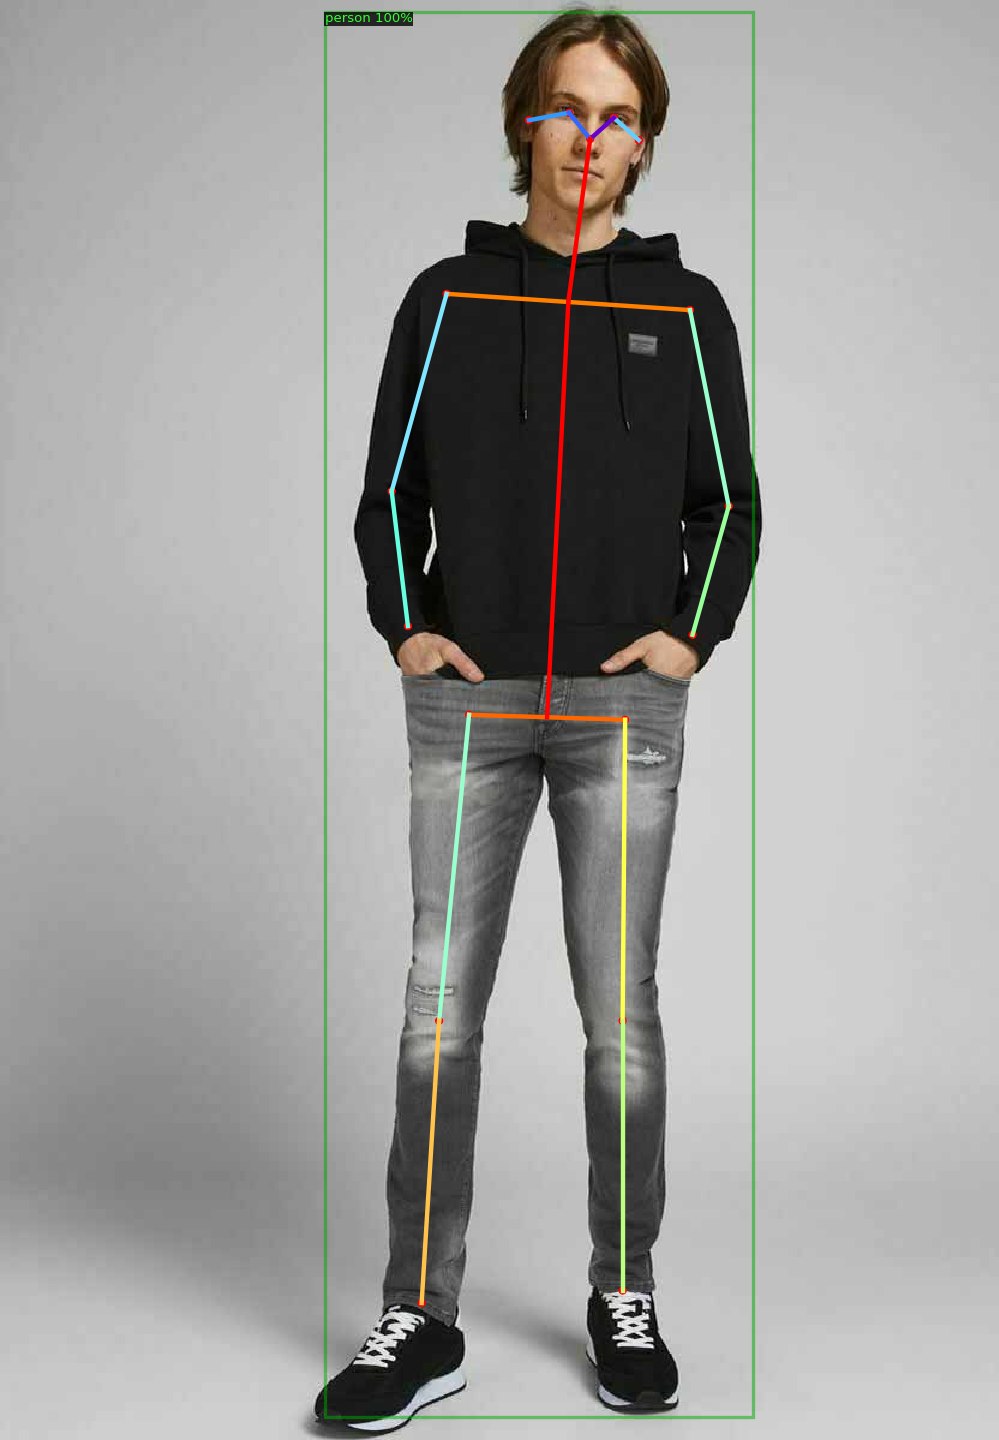

In [7]:
imagePath="/content/0bd58f226c.jpg"
image = cv2.imread(imagePath)
predictions = predictor(image)
viz = Visualizer(image[:,:,::-1],metadata= MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=1.2)#instance_mode=ColorMode.IMAGE_BW)
output = viz.draw_instance_predictions(predictions['instances'].to('cpu'))
#filename = 'result.jpg'
cv2_imshow(output.get_image()[:, :, ::-1])
#cv2.imshow("Result",output.get_image()[:,:,::-1])

#prediction scope

In [8]:
predictions['instances'].to('cpu')

Instances(num_instances=1, image_height=1200, image_width=833, fields=[pred_boxes: Boxes(tensor([[ 270.7387,   10.1805,  627.5736, 1181.0963]])), scores: tensor([0.9998]), pred_classes: tensor([0]), pred_keypoints: tensor([[[4.9181e+02, 1.1582e+02, 3.0155e+00],
         [5.1158e+02, 9.8129e+01, 1.5492e+00],
         [4.7412e+02, 9.3966e+01, 3.4712e+00],
         [5.3238e+02, 1.1686e+02, 1.4821e+00],
         [4.4083e+02, 1.0021e+02, 7.6580e-01],
         [5.7504e+02, 2.5841e+02, 3.7151e-01],
         [3.7217e+02, 2.4488e+02, 3.4460e-01],
         [6.0729e+02, 4.2182e+02, 4.8562e-01],
         [3.2640e+02, 4.0933e+02, 5.8574e-01],
         [5.7712e+02, 5.2903e+02, 6.2637e-01],
         [3.3992e+02, 5.2174e+02, 6.0816e-01],
         [5.2094e+02, 5.9980e+02, 1.6418e-01],
         [3.9090e+02, 5.9564e+02, 1.9443e-01],
         [5.1886e+02, 8.5064e+02, 6.1706e-01],
         [3.6593e+02, 8.5064e+02, 5.0482e-01],
         [5.1886e+02, 1.0755e+03, 4.2676e-01],
         [3.5136e+02, 1.0859e+03,

# the predicted keypoints

In [9]:
predictions['instances'].pred_keypoints.to('cpu')

tensor([[[4.9181e+02, 1.1582e+02, 3.0155e+00],
         [5.1158e+02, 9.8129e+01, 1.5492e+00],
         [4.7412e+02, 9.3966e+01, 3.4712e+00],
         [5.3238e+02, 1.1686e+02, 1.4821e+00],
         [4.4083e+02, 1.0021e+02, 7.6580e-01],
         [5.7504e+02, 2.5841e+02, 3.7151e-01],
         [3.7217e+02, 2.4488e+02, 3.4460e-01],
         [6.0729e+02, 4.2182e+02, 4.8562e-01],
         [3.2640e+02, 4.0933e+02, 5.8574e-01],
         [5.7712e+02, 5.2903e+02, 6.2637e-01],
         [3.3992e+02, 5.2174e+02, 6.0816e-01],
         [5.2094e+02, 5.9980e+02, 1.6418e-01],
         [3.9090e+02, 5.9564e+02, 1.9443e-01],
         [5.1886e+02, 8.5064e+02, 6.1706e-01],
         [3.6593e+02, 8.5064e+02, 5.0482e-01],
         [5.1886e+02, 1.0755e+03, 4.2676e-01],
         [3.5136e+02, 1.0859e+03, 2.7222e-01]]])